In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('A', 'B', 4),
    ('A', 'C', 5),
    ('B', 'C', 3),
    ('B', 'D', 2),
    ('C', 'D', 2)
])

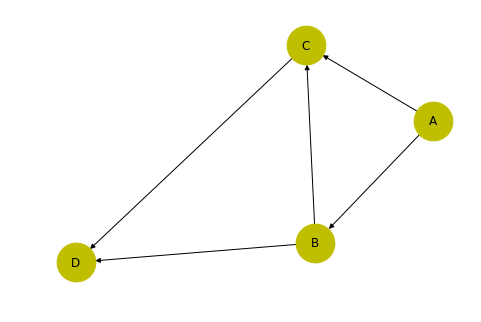

In [3]:
nx.draw(G, with_labels=True, node_size=1500, node_color='y', alpha=1, arrows=True)

In [4]:
def floyd_warshall(G, weight='weight'):
    dist = defaultdict(lambda: defaultdict(lambda: float('inf')))
    
    for v in G:
        dist[v][v] = 0
        
    pred = defaultdict(dict)
    
    undirected = not G.is_directed()
    
    for s, t, d in G.edges(data=True):
        e_weight = d.get(weight, 1.0)
        dist[s][t] = min(e_weight, dist[s][t])
        pred[s][t] = s
        if undirected:
            dist[t][s] = min(e_weight, dist[t][s])
            pred[t][s] = t
            
    for w in G:
        for s in G:
            for t in G:
                if dist[s][t] > dist[s][w] + dist[w][t]:
                    dist[s][t] = dist[s][w] + dist[w][t]
                    pred[s][t] = pred[w][t]
                    
    return dict(pred), dict(dist)


def reconstruct_path(source, target, predecessors):
    if source == target:
        return []
    
    prev = predecessors[source]
    curr = prev[target]
    path = [target, curr]
    
    while curr != source:
        curr = prev[curr]
        path.append(curr)
        
    return list(reversed(path))


def floyd_warshall_numpy(G, nodelist=None, weight='weight'):
    A = nx.to_numpy_matrix(G, nodelist=nodelist, multigraph_weight=min,
                           weight=weight, nonedge=np.inf)
    n, m = A.shape
    I = np.identity(n)
    A[I == 1] = 0
    
    for i in range(n):
        A = np.minimum(A, A[i, :] + A[:, i])
        
    return A

In [5]:
predecessors, distances = floyd_warshall(G, 'weight')
print("\nPredecessors\n", predecessors)

path = reconstruct_path('A', 'D', predecessors)
print("Path\n", path)

matrix = floyd_warshall_numpy(G)
print("\nMatrix\n", matrix)


Predecessors
 {'A': {'B': 'A', 'C': 'A', 'D': 'B'}, 'B': {'C': 'B', 'D': 'B'}, 'C': {'D': 'C'}}
Path
 ['A', 'B', 'D']

Matrix
 [[ 0.  4.  5.  6.]
 [inf  0.  3.  2.]
 [inf inf  0.  2.]
 [inf inf inf  0.]]
